<a href="https://colab.research.google.com/github/pdthang26/Artificial-Intellignece-ST7-1234/blob/main/gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from numpy.ma import masked_invalid
import cv2
import os

def crop_and_resize_face(image):
    # Tạo bộ phân loại khuôn mặt
    face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/AI/haarcascade_frontalface_default.xml')
    picture = cv2.imread(image)

    # Chuyển đổi ảnh đầu vào sang ảnh xám
    gray_image = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)

    # Phát hiện khuôn mặt
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Với mỗi khuôn mặt được phát hiện
    for (x, y, w, h) in faces:
        # Cắt khuôn mặt từ ảnh gốc
        face_image = picture[y:y+h, x:x+w]

        # Resize khuôn mặt với độ phân giải 70x70
        resized_face = cv2.resize(face_image, (30, 30), interpolation = cv2.INTER_AREA)
        # Trả về ảnh khuôn mặt đã được resize
        return resized_face

In [ ]:
def crop_faces(input_dir, output_dir):
    # Tạo bộ phân loại khuôn mặt
    face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/AI/haarcascade_frontalface_default.xml')

    # Lặp qua tất cả các file ảnh trong thư mục đầu vào
    for filename in os.listdir(input_dir):
        # Đọc ảnh đầu vào
        image = cv2.imread(os.path.join(input_dir, filename))

        # Chuyển đổi ảnh đầu vào sang ảnh xám
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Phát hiện khuôn mặt
        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Với mỗi khuôn mặt được phát hiện
        for (x, y, w, h) in faces:
            # Cắt khuôn mặt từ ảnh gốc
            face_image = image[y:y+h, x:x+w]

            # Tạo tên file đầu ra
            output_filename = os.path.splitext(filename)[0] + '_' + str(x) + str(y) + '.jpg'
            output_path = os.path.join(output_dir, output_filename)

            # Ghi khuôn mặt vào file đầu ra
            resized_face = cv2.resize(face_image, (30, 30), interpolation = cv2.INTER_AREA)
            cv2.imwrite(output_path, face_image)

In [ ]:
crop_faces("/content/drive/MyDrive/AI/nu/", "/content/drive/MyDrive/AI/trainning")
crop_faces("/content/drive/MyDrive/AI/nam/", "/content/drive/MyDrive/AI/trainning")

In [ ]:
import cv2
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/AI/trainning/'
photos, labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('man'):
    output = 0
  if file.startswith('women'):
    output = 1
  img = load_img(folder + file, target_size= (30,30))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos=asarray(photos)
labels=asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI/gender_photos.npy',photos)
save('/content/drive/MyDrive/AI/gender_labels.npy',labels)

(91, 30, 30, 3) (91,)


In [ ]:
import numpy as np
X = np.load('/content/drive/MyDrive/AI/gender_photos.npy')
y = np.load('/content/drive/MyDrive/AI/gender_labels.npy')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(81, 30, 30, 3)
(81,)
(10, 30, 30, 3)
(10,)


In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,2)
y_test = to_categorical(y_test,2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
#32 lần
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,30,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lần
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lần
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#256 lần
model.add(Conv2D(256,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
#512 lần
model.add(Conv2D(512,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
#1080 lần
model.add(Conv2D(1080,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1080,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(2,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,epochs=128,batch_size=10,verbose=1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print("loss;" , test_loss)
print("Accuracy:", test_acc)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_54 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_55 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 dropout_55 (Dropout)        (None, 8, 8, 64)         

1/1 [==============================] - 0s 160ms/step


'man'

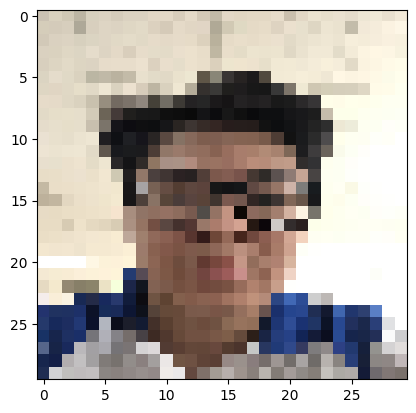

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {0: 'man',1:'women'}
img = load_img("/content/drive/MyDrive/unscale.jpg",target_size= (30,30))
plt.imshow(img)
img = img_to_array(img)
img= img.reshape(1,30,30,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

In [ ]:
model.save("/content/drive/MyDrive/AI/gender.h5")